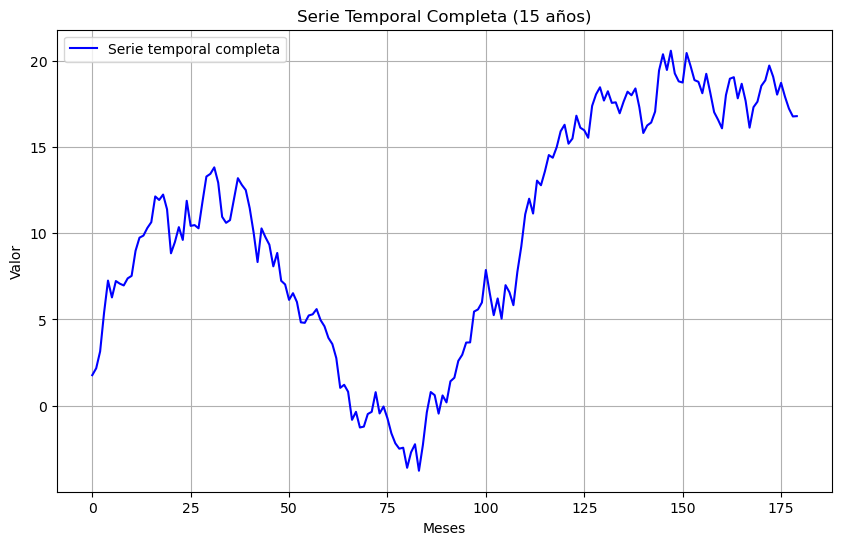

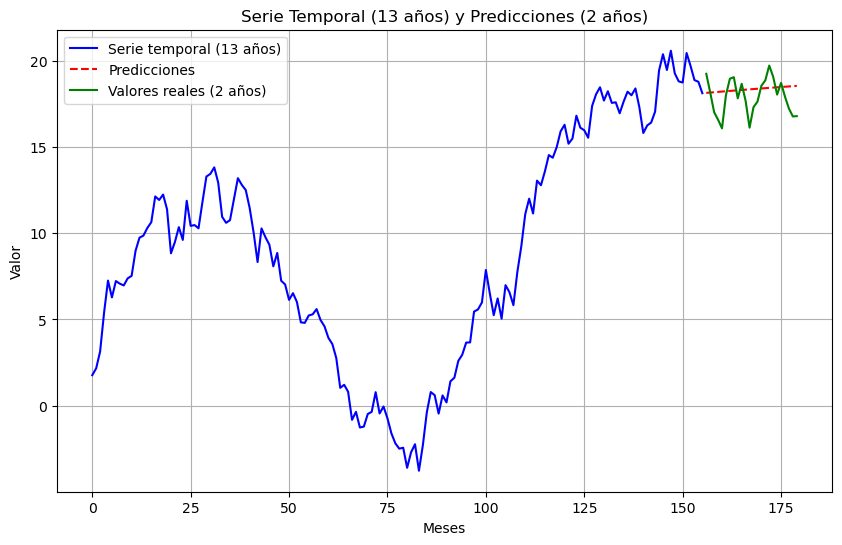

RMSE de las predicciones: 1.10


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse

# Parámetros del modelo AR(1) tipo I(1)
np.random.seed(0)  # Fijamos una semilla para reproducibilidad

# Definimos los parámetros del modelo
alpha = 1 # Parámetro autorregresivo (0 < alpha < 1)
sigma = 1.0  # Desviación estándar del ruido gaussiano

# Generamos la serie temporal original con 15 años de datos
num_years = 15
num_months_per_year = 12
total_months = num_years * num_months_per_year

# Creamos el array para almacenar la serie temporal completa
series_total = np.zeros(total_months)

# Generamos el primer valor aleatorio
series_total[0] = np.random.normal(loc=0.0, scale=sigma)

# Generamos el resto de la serie
for t in range(1, total_months):
    series_total[t] = alpha * series_total[t-1] + np.random.normal(loc=0.0, scale=sigma)

# Graficamos la serie temporal completa (15 años)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(total_months), series_total, label='Serie temporal completa', color='blue')
plt.title('Serie Temporal Completa (15 años)')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Creamos una serie temporal de 13 años para ajustar el modelo
# Tomamos los primeros 13 años de datos (156 meses)
series_13_years = series_total[:13*num_months_per_year]

# Ajustamos un modelo AR(1) a la serie de 13 años
model = AutoReg(series_13_years, lags=1)
model_fit = model.fit()

# Hacemos predicciones para los últimos 2 años (24 meses)
start_pred = len(series_13_years)
end_pred = start_pred + 24

forecast = model_fit.predict(start=start_pred, end=end_pred-1)

# Graficamos la serie temporal de 13 años y las predicciones para los últimos 2 años
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(series_13_years)), series_13_years, label='Serie temporal (13 años)', color='blue')
plt.plot(np.arange(start_pred, end_pred), forecast, label='Predicciones', linestyle='--', color='red')
plt.plot(np.arange(start_pred, end_pred), series_total[start_pred:end_pred], label='Valores reales (2 años)', color='green')
plt.title('Serie Temporal (13 años) y Predicciones (2 años)')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Calculamos el RMSE de las predicciones
actual_values = series_total[start_pred:end_pred]
rmse_score = rmse(actual_values, forecast)
print(f"RMSE de las predicciones: {rmse_score:.2f}")


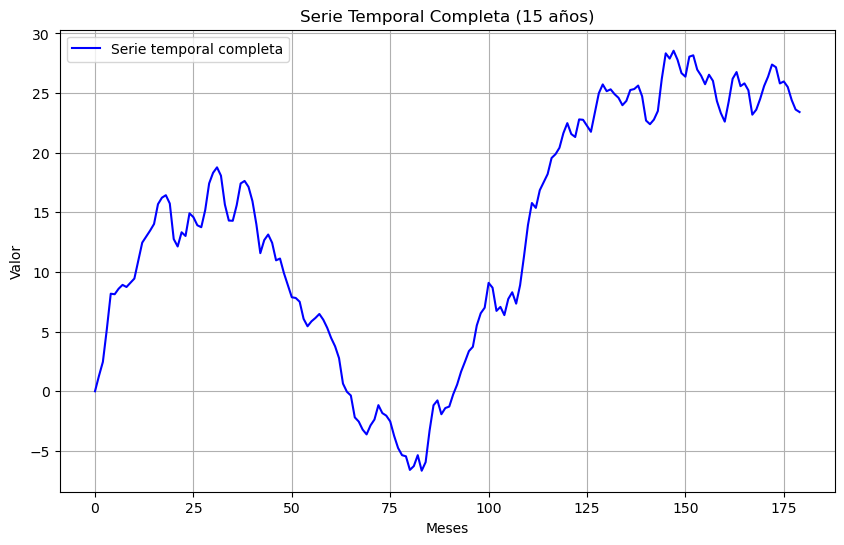

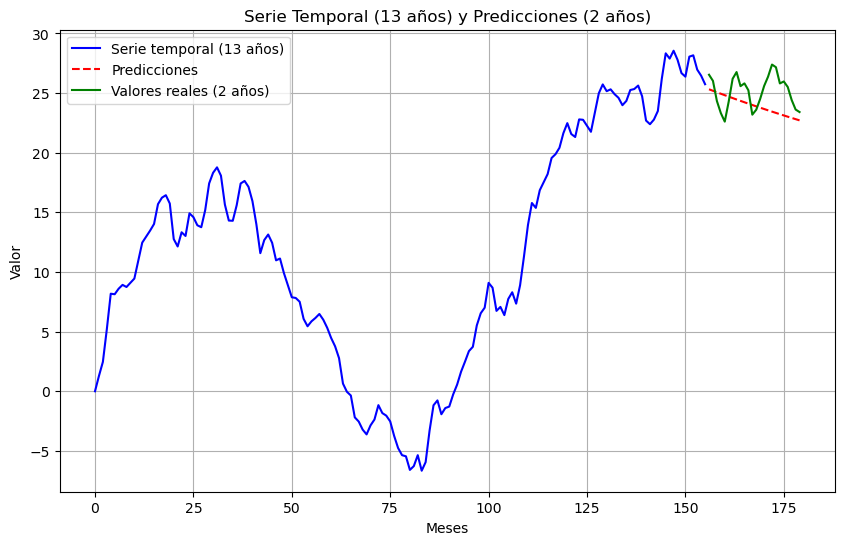

RMSE de las predicciones: 1.95


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse

# Parámetros del modelo ARMA
np.random.seed(0)  # Fijamos una semilla para reproducibilidad

# Definimos los parámetros del modelo ARMA
ar_params = [1.0]  # Coeficientes AR
ma_params = [0.5]        # Coeficientes MA
sigma = 1.0              # Desviación estándar del ruido gaussiano

# Generamos la serie temporal original con 15 años de datos
num_years = 15
num_months_per_year = 12
total_months = num_years * num_months_per_year

# Generamos el ruido gaussiano
noise = np.random.normal(loc=0.0, scale=sigma, size=total_months)

# Creamos el array para almacenar la serie temporal completa
series_total = np.zeros(total_months)

# Generamos los datos siguiendo el modelo ARMA
for t in range(max(len(ar_params), len(ma_params)), total_months):
    ar_component = sum([ar_params[i] * series_total[t-i-1] for i in range(len(ar_params))])
    ma_component = sum([ma_params[i] * noise[t-i-1] for i in range(len(ma_params))])
    series_total[t] = ar_component + ma_component + noise[t]

# Graficamos la serie temporal completa (15 años)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(total_months), series_total, label='Serie temporal completa', color='blue')
plt.title('Serie Temporal Completa (15 años)')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Creamos una serie temporal de 13 años para ajustar el modelo
series_13_years = series_total[:13*num_months_per_year]

# Ajustamos un modelo ARMA a la serie de 13 años
model = ARIMA(series_13_years, order=(1, 0, 1))
model_fit = model.fit()

# Hacemos predicciones para los últimos 2 años (24 meses)
start_pred = len(series_13_years)
end_pred = start_pred + 24

forecast = model_fit.predict(start=start_pred, end=end_pred-1)

# Graficamos la serie temporal de 13 años y las predicciones para los últimos 2 años
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(series_13_years)), series_13_years, label='Serie temporal (13 años)', color='blue')
plt.plot(np.arange(start_pred, end_pred), forecast, label='Predicciones', linestyle='--', color='red')
plt.plot(np.arange(start_pred, end_pred), series_total[start_pred:end_pred], label='Valores reales (2 años)', color='green')
plt.title('Serie Temporal (13 años) y Predicciones (2 años)')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Calculamos el RMSE de las predicciones
actual_values = series_total[start_pred:end_pred]
rmse_score = rmse(actual_values, forecast)
print(f"RMSE de las predicciones: {rmse_score:.2f}")


In [65]:
import pandas as pd

# Crear DataFrame con la serie temporal completa
data = {'Month': np.arange(1, total_months + 1), 'Target': series_total}
df = pd.DataFrame(data)

# Agregar columnas con desfasajes positivos
for lag in range(1, 7):
    df[f'Lag_{lag}'] = df['Target'].shift(lag)

# Eliminar filas con NaN
df = df.dropna().reset_index(drop=True)
print(df.head())


   Month    Target     Lag_1     Lag_2     Lag_3     Lag_4     Lag_5     Lag_6
0      7  8.597217  8.135768  8.179267  5.191262  2.461000  1.282183  0.000000
1      8  8.920904  8.597217  8.135768  8.179267  5.191262  2.461000  1.282183
2      9  8.742007  8.920904  8.597217  8.135768  8.179267  5.191262  2.461000
3     10  9.100996  8.742007  8.920904  8.597217  8.135768  8.179267  5.191262
4     11  9.450339  9.100996  8.742007  8.920904  8.597217  8.135768  8.179267


Mean Squared Error: 3.42


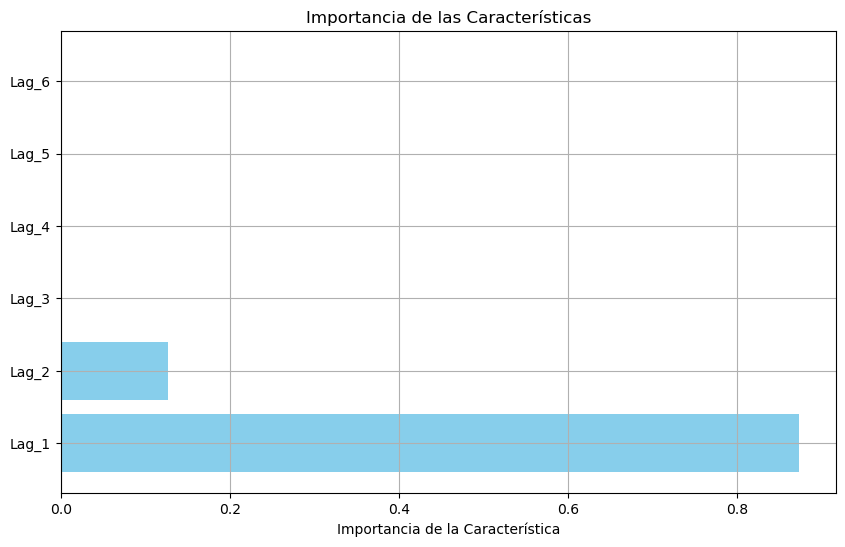

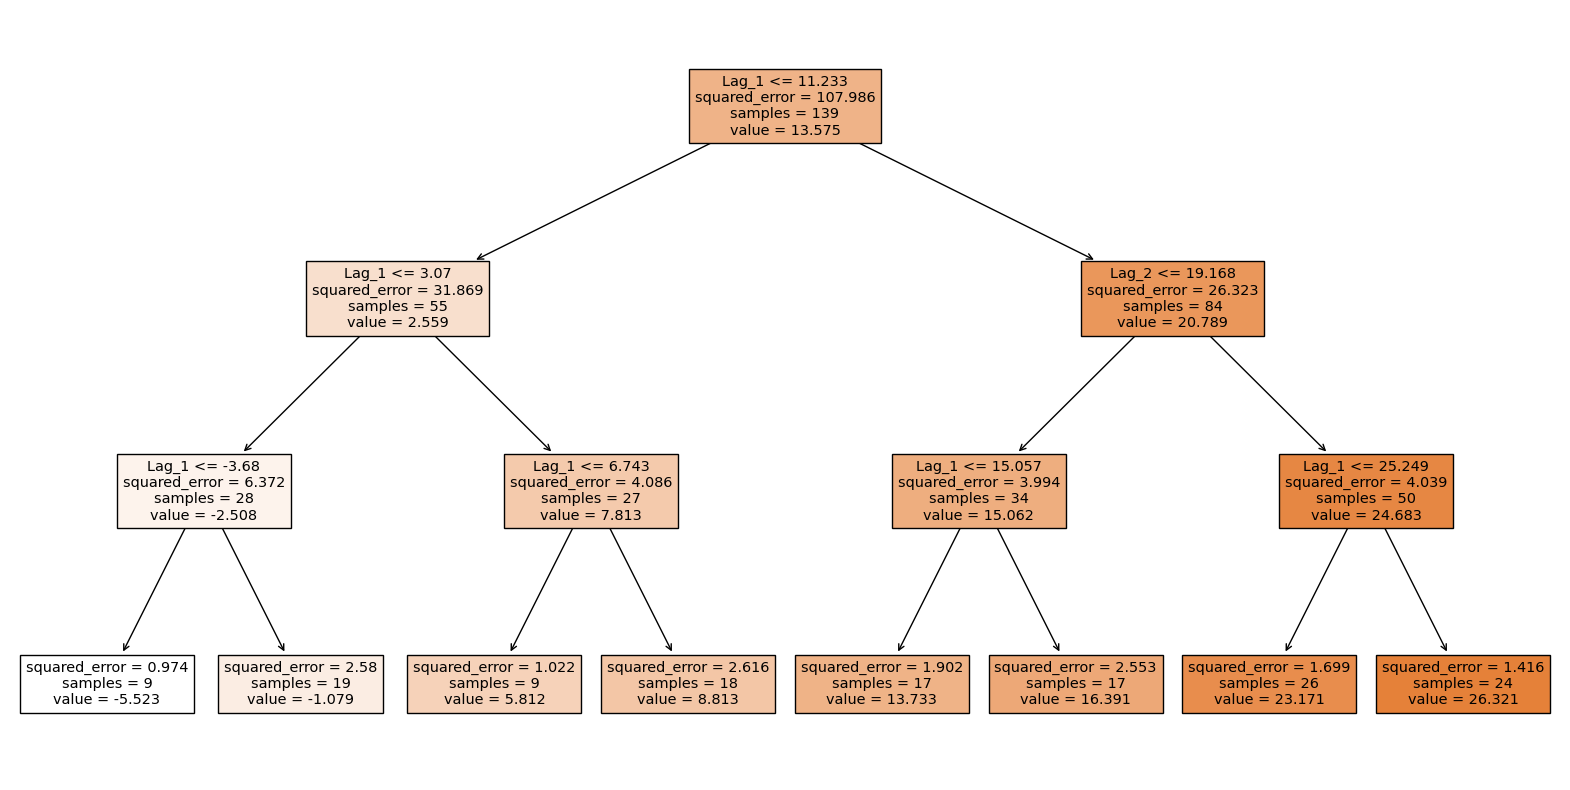

In [71]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Definir los parámetros del modelo (puedes ajustarlos según sea necesario)
model_type = 'regressor'  # 'regressor' o 'classifier'
max_depth = 3
min_samples_split = 2
min_samples_leaf = 1
random_state = 0

# Crear el modelo según el tipo especificado
if model_type == 'regressor':
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, random_state=random_state)
else:
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf, random_state=random_state)

# Separar las características (features) y el objetivo (target)
X = df.drop(columns=['Month', 'Target'])
y = df['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
if model_type == 'regressor':
    score = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {score:.2f}')
else:
    score = model.score(X_test, y_test)
    print(f'Accuracy: {score:.2f}')

# Importancia de las características
feature_importances = model.feature_importances_

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de las Características')
plt.grid(True)
plt.show()

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


In [78]:
# Identificar las dos características más importantes
important_features = X.columns[np.argsort(feature_importances)[-2:]][::-1]  # Ordenar de mayor a menor importancia

# Crear un nuevo DataFrame con el target y las dos características más importantes
df_important = df[['Target'] + list(important_features)]
print(df_important.head())


     Target     Lag_1     Lag_2
0  8.597217  8.135768  8.179267
1  8.920904  8.597217  8.135768
2  8.742007  8.920904  8.597217
3  9.100996  8.742007  8.920904
4  9.450339  9.100996  8.742007


R²: 0.44
MSE: 0.90


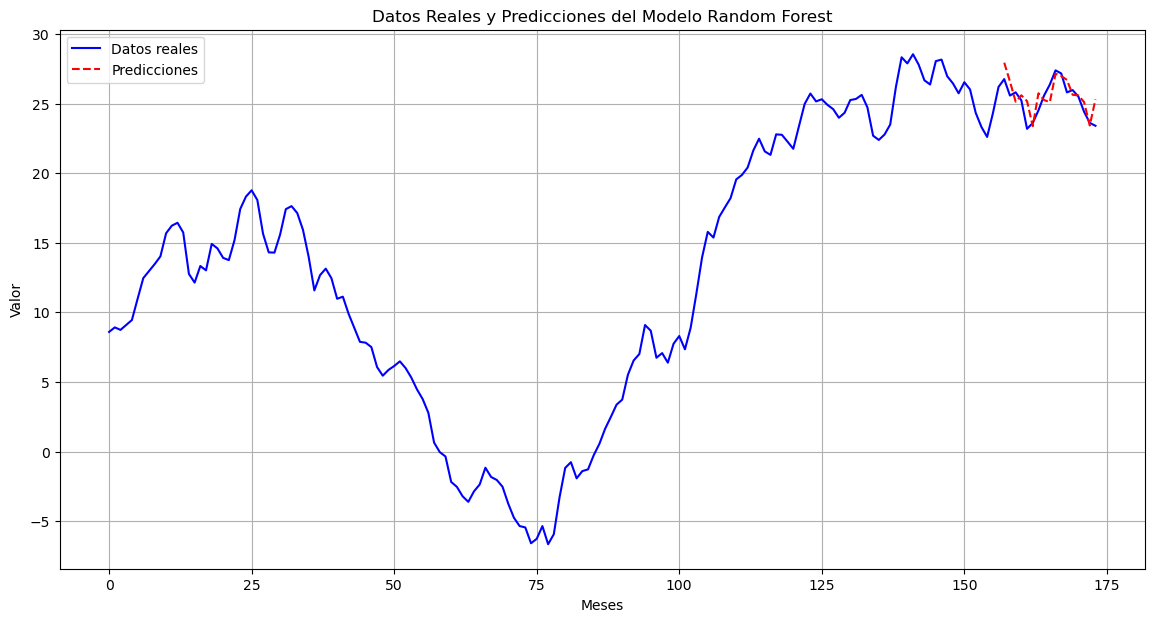

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Crear DataFrame con la serie temporal completa
data = {'Month': np.arange(1, total_months + 1), 'Target': series_total}
df = pd.DataFrame(data)

# Agregar columnas con desfasajes positivos
for lag in range(1, 7):
    df[f'Lag_{lag}'] = df['Target'].shift(lag)

# Eliminar filas con NaN
df = df.dropna().reset_index(drop=True)

# Identificar las dos características más importantes con un modelo de árbol de decisión
X = df.drop(columns=['Month', 'Target'])
y = df['Target']

model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=0)
model.fit(X, y)
feature_importances = model.feature_importances_
important_features = X.columns[np.argsort(feature_importances)[-2:]][::-1]  # Ordenar de mayor a menor importancia

# Crear un nuevo DataFrame con el target y las dos características más importantes
df_important = df[['Target'] + list(important_features)]

# Separar las características (features) y el objetivo (target)
X_important = df_important.drop(columns=['Target'])
y_important = df_important['Target']

# Separar el 10% de los últimos datos consecutivos para validación
validation_size = int(0.1 * len(df_important))
X_train = X_important[:-validation_size]
y_train = y_important[:-validation_size]
X_val = X_important[-validation_size:]
y_val = y_important[-validation_size:]

# Entrenar el modelo Random Forest
params = {
    'n_estimators': 20,  # Número de árboles en el random forest
    'random_state': 42,  # Semilla para la reproducibilidad
    'max_depth': None,  # Profundidad máxima de los árboles
    'min_samples_leaf': 1,  # Número mínimo de muestras por hoja
}

rf_model = RandomForestRegressor(
    n_estimators=params['n_estimators'],
    random_state=params['random_state'],
    max_depth=params['max_depth'],
    min_samples_leaf=params['min_samples_leaf']
)

rf_model.fit(X_train, y_train)

# Realizar predicciones para el conjunto de validación
y_pred = rf_model.predict(X_val)

# Calcular métricas
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print(f'R²: {r2:.2f}')
print(f'MSE: {mse:.2f}')

# Graficar los datos reales y las predicciones
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(y_important)), y_important, label='Datos reales', color='blue')
plt.plot(np.arange(len(y_important) - validation_size, len(y_important)), y_pred, label='Predicciones', linestyle='--', color='red')
plt.title('Datos Reales y Predicciones del Modelo Random Forest')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()
